### Importa√ß√£o dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

Produto Categoria do Produto    Pre√ßo      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escrit√≥rio               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      Jo√£o Souza              DF                    1   
3     03/05/2022      Jo√£o Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito                       4 -22.25 -42.66  
2    cartao_credito                       1 -15.83 -47.86  
3            boleto                       1 -30.17 -53.50  
4            boleto                       1 -18.10 -44.38

#1. An√°lise do faturamento


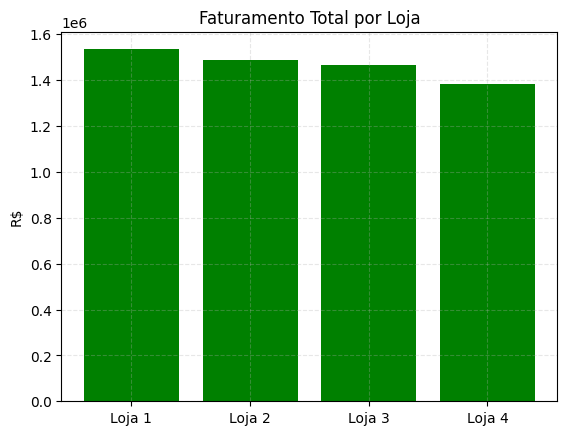

In [2]:
# An√°lise de Dados - Desafio Alura Store
# Autor: Dragos Calin
# Objetivo: Identificar qual loja da rede Alura Store tem o pior desempenho para ser vendida.

import matplotlib.pyplot as plt

# Fun√ß√£o para calcular m√©tricas por loja
def faturamento(df):
    return df["Pre√ßo"].sum()

faturamentos = {
    'Loja 1': faturamento(loja),
    'Loja 2': faturamento(loja2),
    'Loja 3': faturamento(loja3),
    'Loja 4': faturamento(loja4),
}

plt.bar(faturamentos.keys(), faturamentos.values(), color='green')
plt.title('Faturamento Total por Loja')
plt.ylabel('R$')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# 2. Vendas por Categoria


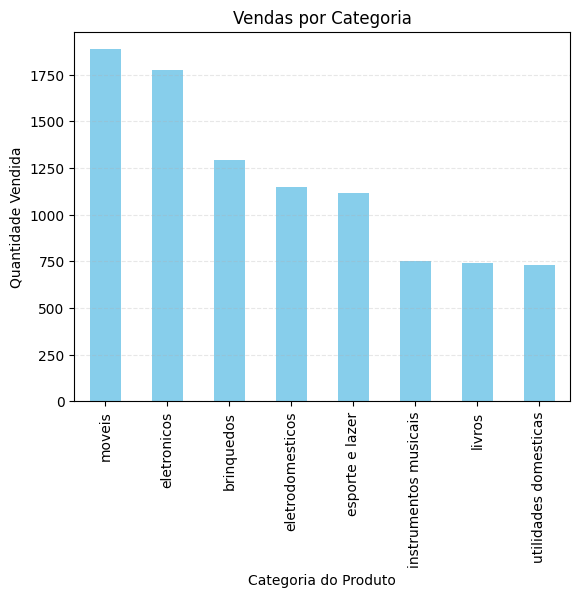

In [3]:
# Categoria mais vendida por loja
todas = pd.concat([loja, loja2, loja3, loja4])
categoria_vendas = todas['Categoria do Produto'].value_counts()

categoria_vendas.plot(kind='bar', color='skyblue')
plt.title('Vendas por Categoria')
plt.ylabel('Quantidade Vendida')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

# 3. M√©dia de Avalia√ß√£o das Lojas

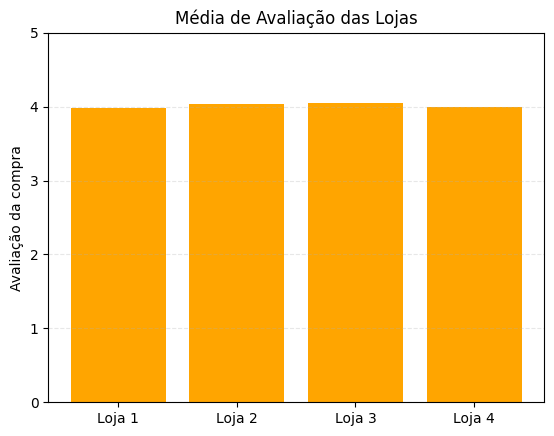

In [4]:
# Avalia√ß√£o m√©dia
avaliacoes = {
    'Loja 1': round(loja['Avalia√ß√£o da compra'].mean(), 2),
    'Loja 2': round(loja2['Avalia√ß√£o da compra'].mean(), 2),
    'Loja 3': round(loja3['Avalia√ß√£o da compra'].mean(), 2),
    'Loja 4': round(loja4['Avalia√ß√£o da compra'].mean(), 2),
}

plt.bar(avaliacoes.keys(), avaliacoes.values(), color='orange')
plt.title('M√©dia de Avalia√ß√£o das Lojas')
plt.ylabel('Avalia√ß√£o da compra')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
produto_mais_vendido = todas['Produto'].value_counts().idxmax()
produto_menos_vendido = todas['Produto'].value_counts().idxmin()

print("Produto mais vendido:", produto_mais_vendido)
print("Produto menos vendido:", produto_menos_vendido)

Produto mais vendido: C√¥moda
Produto menos vendido: Celular ABXY


# 5. Frete M√©dio por Loja

1.   List item
2.   List item




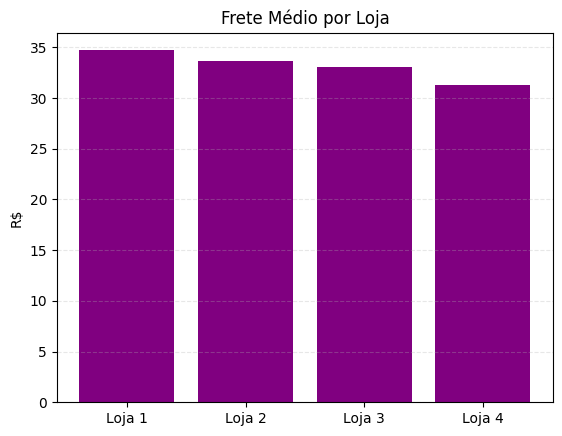

In [ ]:
fretes = {
    'Loja 1': round(loja['Frete'].mean(), 2),
    'Loja 2': round(loja2['Frete'].mean(), 2),
    'Loja 3': round(loja3['Frete'].mean(), 2),
    'Loja 4': round(loja4['Frete'].mean(), 2),
}

plt.bar(fretes.keys(), fretes.values(), color='purple')
plt.title('Frete M√©dio por Loja')
plt.ylabel('R$')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

# 6. Resultado


In [6]:
# 6. Resultado

from sklearn.preprocessing import MinMaxScaler

# Fun√ß√£o para calcular as m√©tricas relevantes
def calcular_metricas(df):
    return {
        'Faturamento': round(df['Pre√ßo'].sum(), 2),
        'Avalia√ß√£o M√©dia': round(df['Avalia√ß√£o da compra'].mean(), 2),
        'Frete M√©dio': round(df['Frete'].mean(), 2),
        'Diversidade Produtos': df['Produto'].nunique()
    }

# Aplicar fun√ß√£o em cada loja
metricas = []
for nome, df in zip(['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'], [loja, loja2, loja3, loja4]):
    m = calcular_metricas(df)
    m['Loja'] = nome
    metricas.append(m)

# Criar DataFrame com os resultados
df_metricas = pd.DataFrame(metricas).set_index('Loja')

# Normalizar os dados (para pontua√ß√£o de 0 a 1)
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_metricas), columns=df_metricas.columns, index=df_metricas.index)

# Inverter a m√©trica de Frete M√©dio (menor √© melhor)
df_norm['Frete M√©dio'] = 1 - df_norm['Frete M√©dio']

# Calcular pontua√ß√£o final como m√©dia das m√©tricas normalizadas
df_norm['Pontua√ß√£o Final'] = df_norm.mean(axis=1)

# Juntar dados reais com pontua√ß√£o final
df_resultado = df_metricas.copy()
df_resultado['Pontua√ß√£o Final'] = df_norm['Pontua√ß√£o Final']

# Ordenar da melhor para a pior
df_resultado = df_resultado.sort_values(by='Pontua√ß√£o Final', ascending=False)

# Exibir resultado final
display(df_resultado)

# Recomenda√ß√£o final
loja_vender = df_resultado.tail(1).index[0]
print(f"üèÅ Recomenda√ß√£o Final: Vender a {loja_vender}, que teve o pior desempenho considerando todas as m√©tricas.")

Faturamento  Avalia√ß√£o M√©dia  Frete M√©dio  Diversidade Produtos  \
Loja                                                                      
Loja 3   1464025.03             4.05        33.07                    51   
Loja 2   1488459.06             4.04        33.62                    51   
Loja 4   1384497.58             4.00        31.28                    51   
Loja 1   1534509.12             3.98        34.69                    51   

        Pontua√ß√£o Final  
Loja                     
Loja 3         0.501304  
Loja 2         0.465987  
Loja 4         0.321429  
Loja 1         0.250000

üèÅ Recomenda√ß√£o Final: Vender a Loja 1, que teve o pior desempenho considerando todas as m√©tricas.
